## 영상정보처리 10주차 과제 템플리트
- 점수: 10점 만점
    
이름: 김경민          
학번: 32200327


# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [55]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week10/
!pwd

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week10
/gdrive/My Drive/Classroom/[22-1 영상정보처리] 2000004793-2022-1/ImageProcClass/Notebook-week10


In [56]:
image_path = '../Dongkeun-OpenCV-ImgData/leaf.png'
image_path_noised = '../Dongkeun-OpenCV-ImgData/leaf-noise.png'

##문제 1
1. otsu's binarization에서 같이 사용하는 thresholding  방법론 THRESH_BINARY, THRESH_TRUC, THRESH_TOZERO 변경하여 사용 경우, 필터링으로 선작업을 하지 않은 결과에 어떤 영향을 미치는 지, 예시하는 프로그램과 결과를 간단하게 정리하시오. 

2. 또한 위의 분석을 가우시안 필러를 적용했을 때, 어떻게 변화하는 지 예시하는 프로그램과 결과를 간단하게 정리하시오. 

테스트 이미지는 위에서 주어진 image_path, image_path_noised 를 사용하시오. 







In [57]:
def show_hist_with_matplotlib_gray_modified(hist, title, color, t=-1):
    """Shows the histogram using matplotlib capabilities"""

    # ax = plt.subplot(2, 2, pos)
    # plt.title(title)
    plt.xlabel("bins")
    plt.ylabel("number of pixels")
    plt.xlim([0, 256])
    plt.axvline(x=t, color='m', linestyle='--')
    plt.plot(hist, color=color)

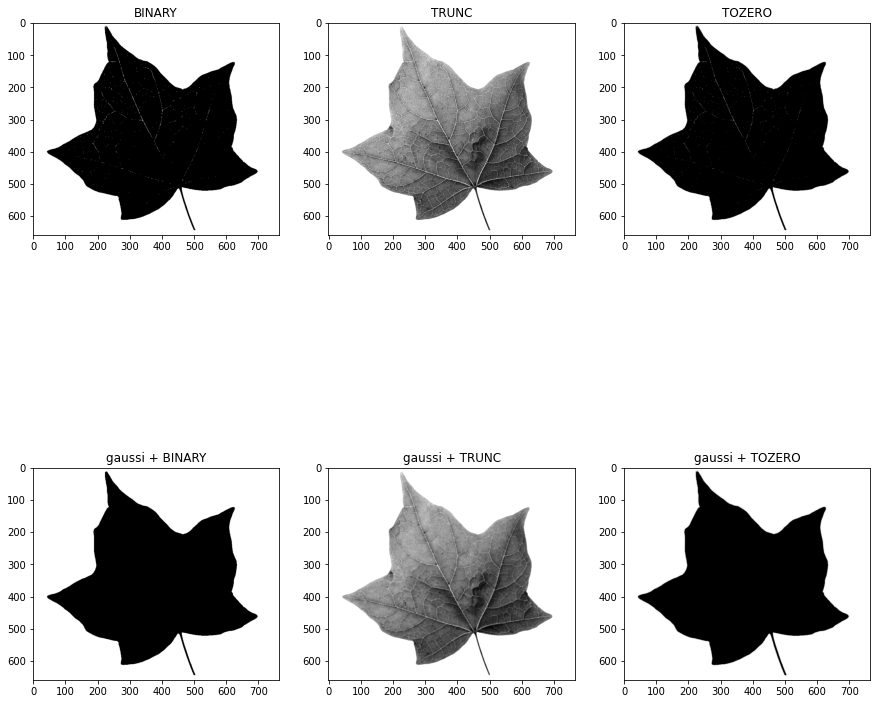

In [58]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#cv2_imshow(gray_image)
#print()


# Otsu's algorithm + 각 threshold 방식 적용
hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

ret1, th1 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, th2 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret3, th3 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)


# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray_image,(5,5),0) # 가우시안 필터 적용 
hist2 = cv2.calcHist([blur], [0], None, [256], [0, 256])

ret4, th4 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret5, th5 = cv2.threshold(blur, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret6, th6 = cv2.threshold(blur, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)


fig, ax = plt.subplots(2, 3,figsize=(15,15))
ax[0,0].imshow(th1,cmap="gray")
ax[0,0].set_title("BINARY")
ax[0,1].imshow(th2,cmap="gray")
ax[0,1].set_title("TRUNC")
ax[0,2].imshow(th3,cmap="gray")
ax[0,2].set_title("TOZERO")

ax[1,0].imshow(th4,cmap="gray")
ax[1,0].set_title("gaussi + BINARY")
ax[1,1].imshow(th5,cmap="gray")
ax[1,1].set_title("gaussi + TRUNC")
ax[1,2].imshow(th6,cmap="gray")
ax[1,2].set_title("gaussi + TOZERO")

print()


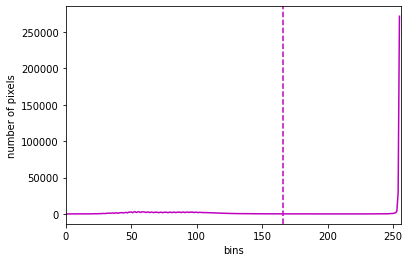

In [59]:
show_hist_with_matplotlib_gray_modified(hist, "OTSU+BINARY histogram", 'm', ret1)

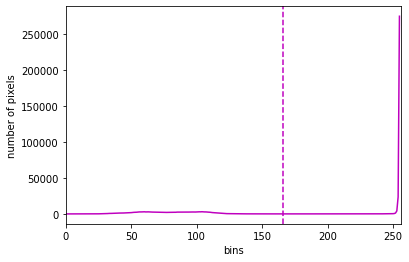

In [60]:
show_hist_with_matplotlib_gray_modified(hist2, "OTSU+BINARY with Gaussian filter histogram", 'm', ret4)

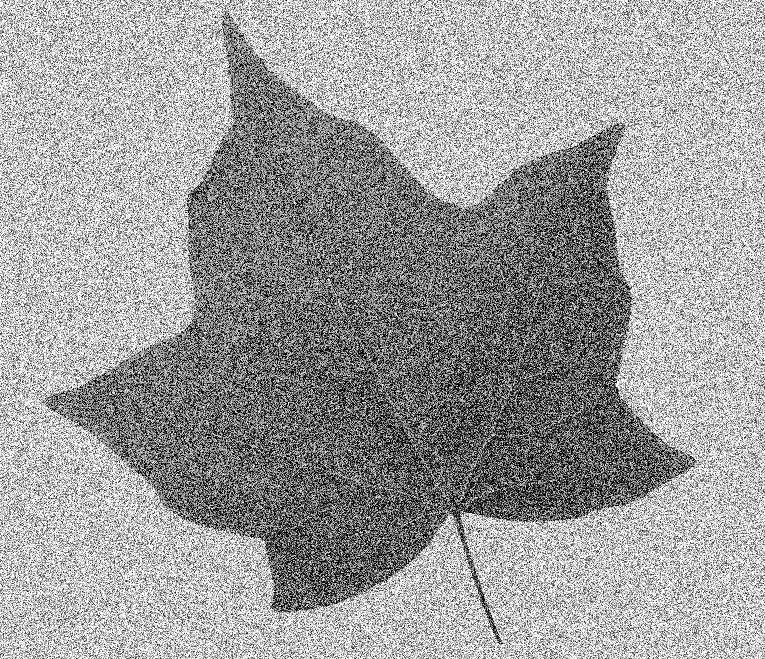

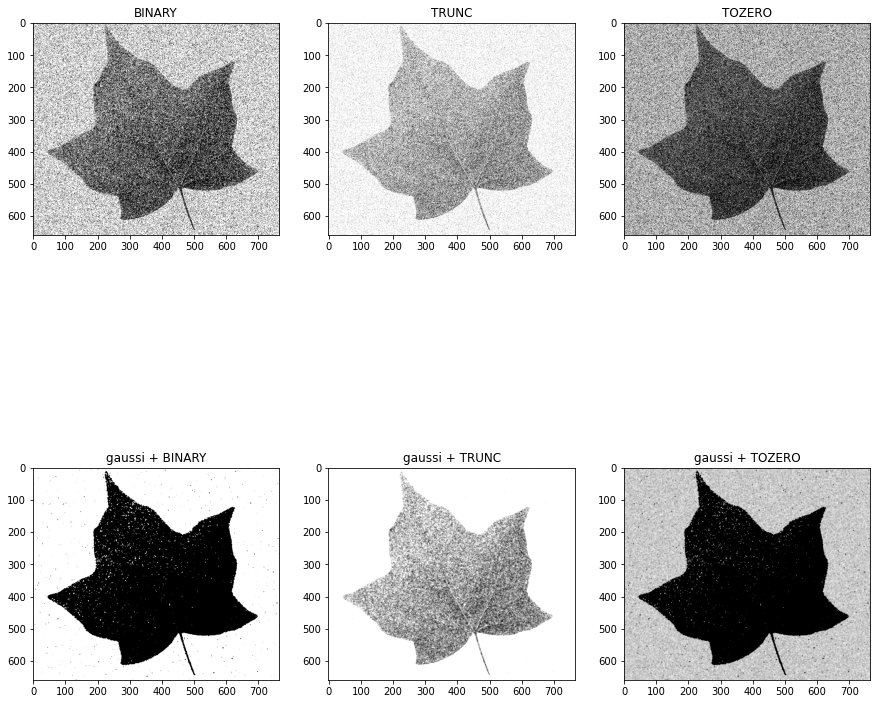

In [66]:
#### 노이즈 있는 이미지로 추가 실험 ####
image_noised = cv2.imread(image_path_noised)
gray_image_noised = cv2.cvtColor(image_noised, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_image_noised)
print()

# Otsu's algorithm + 각 threshold 방식 적용
hist = cv2.calcHist([gray_image_noised], [0], None, [256], [0, 256])

ret7, th7 = cv2.threshold(gray_image_noised, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret8, th8 = cv2.threshold(gray_image_noised, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret9, th9 = cv2.threshold(gray_image_noised, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)


# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(gray_image_noised,(5,5),0) # 가우시안 필터 적용 
hist2 = cv2.calcHist([blur], [0], None, [256], [0, 256])

ret10, th10 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret11, th11 = cv2.threshold(blur, 0, 255, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)
ret12, th12 = cv2.threshold(blur, 0, 255, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)


fig2, ax2 = plt.subplots(2, 3,figsize=(15,15))
ax2[0,0].imshow(th7,cmap="gray")
ax2[0,0].set_title("BINARY")
ax2[0,1].imshow(th8,cmap="gray")
ax2[0,1].set_title("TRUNC")
ax2[0,2].imshow(th9,cmap="gray")
ax2[0,2].set_title("TOZERO")

ax2[1,0].imshow(th10,cmap="gray")
ax2[1,0].set_title("gaussi + BINARY")
ax2[1,1].imshow(th11,cmap="gray")
ax2[1,1].set_title("gaussi + TRUNC")
ax2[1,2].imshow(th12,cmap="gray")
ax2[1,2].set_title("gaussi + TOZERO")

print()

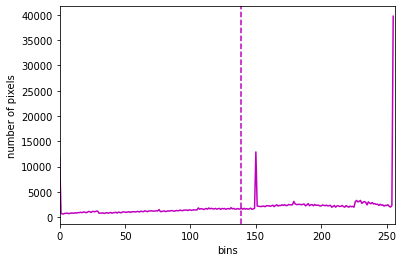

In [67]:
show_hist_with_matplotlib_gray_modified(hist, "OTSU+BINARY histogram", 'm', ret7)

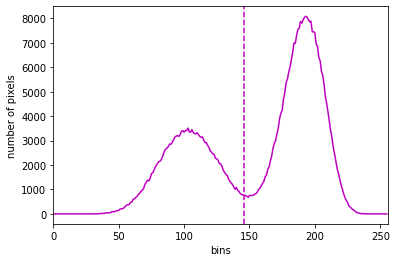

In [68]:
show_hist_with_matplotlib_gray_modified(hist2, "OTSU+BINARY with Gaussian filter histogram", 'm', ret10)

### 문제 2 
위의 노이즈가 있는 영상에 가우시안 필터링을 사용하는 경우, otsu's binarization 과 triangle ninarization 방법론의 성능의 소요 시간을 측정하고, 간단하게 결과를 정리하시오. 시간을 분석할 때는, 필터링 시간은 따로 측정하여, 순수하게 각 방법론에 걸린 시간, 총 시간을 연계하여 분석하시오. 

In [73]:
import time

image_noised = cv2.imread(image_path_noised)
gray_image_noised = cv2.cvtColor(image_noised, cv2.COLOR_BGR2GRAY)

#### OTSU 적용 ####

start1_all = time.time()
blur = cv2.GaussianBlur(gray_image_noised,(5,5),0) # 가우시안 필터 적용

start_1 = time.time()  # 시작 시간 
ret1, th1 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
end_1 = time.time()  # 종료 시간
print("time_OTSU :", end_1 - start_1)

end1_all = time.time()
print("time_OTSU(all) :", end1_all - start1_all)

print()

#### TRIANGLE 적용 ####

start2_all = time.time()
blur = cv2.GaussianBlur(gray_image_noised,(5,5),0) # 가우시안 필터 적용

start_2 = time.time()
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_TRIANGLE)
end_2 = time.time()
print("time_TRIANGLE :", end_2 - start_2)

end2_all = time.time()
print("time_TRIANGLE(all) :", end2_all - start2_all)


time_OTSU : 0.0005776882171630859
time_OTSU(all) : 0.0024843215942382812

time_TRIANGLE : 0.0009937286376953125
time_TRIANGLE(all) : 0.002836942672729492


OTSU 알고리즘에 비해 TRIANGLE 알고리즘이 더 소요시간 김 -> 기하학적 방법 사용해 더 복잡한 알고리즘 사용하기 때문일 것이라고 판단   
   
전체 시간도 OTSU 알고리즘이 더 크지만 크게 차이 나지는 않음